In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [3]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT295Chip3_BF_20230822\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=116)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr,phi
0,1,-116.0,0.049974,4.121207,1.438984e-07,32596.221027,65.401960,35605.336329,85.402351,3.856946e+05,9.555348e+03,-76.223305,0.000069,-0.055268
1,2,-116.0,0.050002,4.130609,3.269451e-06,26528.232999,1040.103371,26528.700069,320879.964737,1.506754e+09,1.035418e+15,-76.734492,0.018702,-0.352555
2,3,-116.0,0.050014,4.131389,1.555690e-07,28954.983433,55.999014,31433.418473,77.182864,3.672294e+05,1.009342e+04,-76.710948,0.000069,-0.213154
3,4,-116.0,0.049976,4.133897,1.176451e-07,35916.090964,65.337002,38967.743207,87.925088,4.586266e+05,1.168950e+04,-75.772770,0.000055,-0.084980
4,5,-116.0,0.050007,4.135004,1.530011e-07,26880.346747,47.307465,28680.691744,67.118910,4.282218e+05,1.434633e+04,-76.958698,0.000053,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,376,-116.0,0.049998,5.923759,8.698988e-07,10782.936608,20.799657,11423.183794,22.017470,1.923874e+05,3.599567e+03,-80.894629,0.000075,-0.098905
376,377,-116.0,0.049993,5.931092,3.762240e-07,18086.524641,30.947708,20164.397481,34.122095,1.755179e+05,1.923327e+03,-78.870249,0.000061,-0.024480
377,378,-116.0,0.050008,5.940792,4.180132e-07,15360.202100,23.420469,16590.432698,26.030295,2.071420e+05,2.852137e+03,-79.442137,0.000045,0.093430
378,379,-116.0,0.050019,5.943215,1.198690e-06,9627.007243,21.295404,10208.373249,22.240584,1.690434e+05,3.090990e+03,-81.391238,0.000090,-0.091430


In [4]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])
phi = np.array(df['phi'])
Q_master = np.stack((f0s, Qs, Qis, Qcs, phi), axis=1)
np.savetxt('LT295chip3_Qs.txt', Q_master, header='f0 Ql Qi Qc', fmt='%s', delimiter='\t')

In [4]:
def fit(x, a, b):
    return a*x**(-2)+b 

230
-309472.87609679124 41916.165657741476


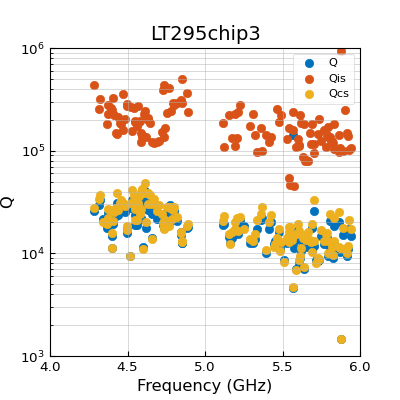

In [9]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT295chip3')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,6)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

In [3]:
master = np.loadtxt('LT295chip3_master.txt', skiprows=1, delimiter=',')
Qs = np.loadtxt('LT295chip3_Qs.txt', skiprows=1, delimiter='\t')
fab_Qc = np.load('LT295_FAB_Qs.npy')
f0_meas = master[:, 6]
f0_mapped = f0_meas
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]

min_df = 0.001
df0s = f0_Q[1:] - f0_Q[:-1]
df_mask = np.zeros(f0_Q.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))

Qi_mask = (Qi > 1e5)  & (Qi < 2e6)
Qc_mask = Qc < 1.5e5
mask = Qi_mask & Qc_mask & ~too_close_mask

Qs[~mask] = np.nan
f0_Q = Qs[:, 0]
Ql = Qs[:, 1]
Qc = Qs[:, 3]
Qi = Qs[:, 2]
phi = Qs[:, 4]


nan nan


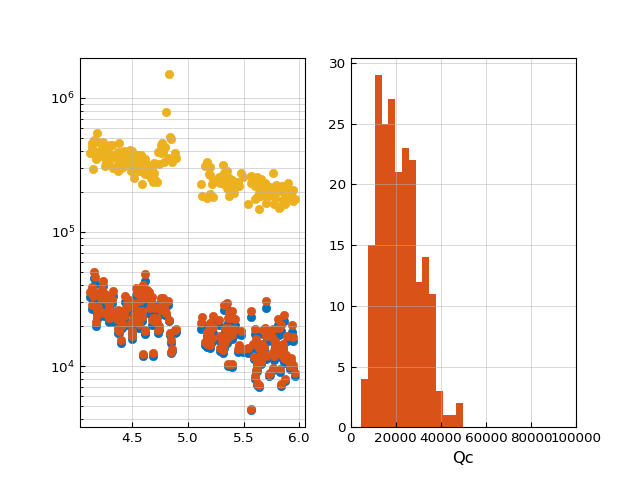

In [4]:
fig, axes = plt.subplot_mosaic('ab')
ax = axes['a']
ax.scatter(f0_Q, Ql)
ax.scatter(f0_Q, Qc)
ax.scatter(f0_Q, Qi)
Qs = np.stack((f0_Q, Ql, Qi, Qc, phi), axis=1)
ax.set_yscale('log')
ax = axes['b']
_ = ax.hist(Qc, facecolor='o', bins=15)
ax.set_xlim(0, 100000)
ax.set_xlabel('Qc')
print(np.mean(Qc), np.std(Qc))

In [5]:
nr = len(f0_mapped)
f0_dark = Qs[:, 0]
tones = np.empty(nr)
tones[:] = np.nan
Qs_sorted = np.empty((nr, 5))
Qs_sorted[:] = np.nan
idxs = np.empty(nr)
idxs[:] = np.nan
for id, f0 in enumerate(f0_mapped):
    if ~np.isnan(f0):
        closest =  np.nanargmin(np.abs(f0 - f0_dark))
        if ~np.isnan(f0_dark[closest]):
            tone = f0_dark[closest]
            Q = Qs[closest]
            if closest in idxs:
                idx_location = np.where(idxs == closest)[0]
                if len(idx_location) == 1:
                    prev_id = idx_location[0]
                    prev_f0 = f0_mapped[prev_id]
                    curr_diff = np.abs(f0 - tone)
                    prev_diff = np.abs(prev_f0 - tone)
                    if curr_diff < prev_diff:
                        tones[prev_id] = np.nan
                        Qs_sorted[prev_id] = np.nan
                        idxs[prev_id] = np.nan
                    else:
                        tone = np.nan
                        Q = np.nan
                        closest = np.nan
                else:
                    print('more than one match')
                    tone = np.nan
                    Q = np.nan
                    closest = np.nan
            else:
                pass
        else:
            tone = np.nan
            Q = np.nan
            closest = np.nan
    else:
        tone = np.nan
        Q = np.nan
        closest = np.nan
    tones[id] = tone
    Qs_sorted[id] = Q
    idxs[id] = closest

f0 = Qs_sorted[:, 0]
Ql = Qs_sorted[:, 1]
Qc = Qs_sorted[:, 3]
Qi = Qs_sorted[:, 2]
phi = Qs_sorted[:, 4]

mean= 0.2985615193594081 std= 0.3795185252550247


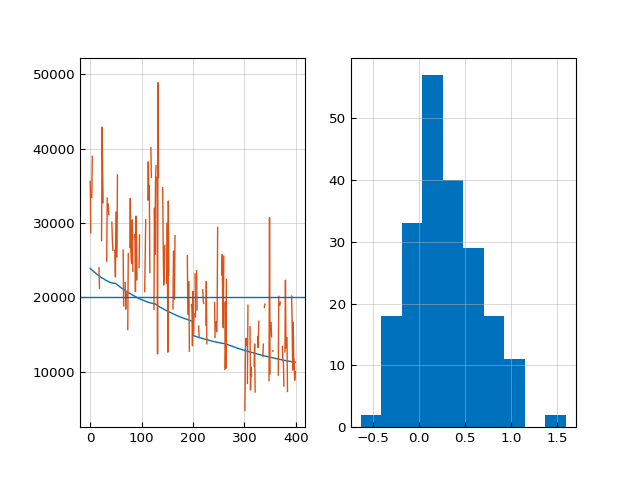

In [6]:
fig, axes = plt.subplot_mosaic('ab')
ax = axes['a']
ax.plot(fab_Qc)
ax.plot(Qc)
ax.axhline(20e3)
ax = axes['b']
dQ_Q = (Qc - fab_Qc)/fab_Qc
# dQ_Q = (Qc - 20e3)/20e3
_ = ax.hist(dQ_Q)
print('mean=', np.nanmean(dQ_Q), 'std=', np.nanstd(dQ_Q))

In [7]:
Qs[~mask] = np.nan
extra_data = {
    'KID': np.full(f0_meas.shape, '', dtype=object),
    'f0_Q': np.full(f0_meas.shape, np.nan),
    'Ql': np.full(f0_meas.shape, np.nan),
    'Qc': np.full(f0_meas.shape, np.nan),
    'Qi': np.full(f0_meas.shape, np.nan),
    'dw': np.full(f0_meas.shape, np.nan),
}
gebruikt = np.full(f0_meas.shape, False)

# -- 4. Match alleen geldige f0_meas én als f0_Q > f0_meas --
tolerance = 0.001  # GHz

for i, row in enumerate(Qs):
    if ~np.isnan(row[0]):
        f_q = row[0]
        verschil = np.abs(f0_meas - f_q)

    # Vind kandidaten: nog niet gebruikt, niet te dicht, binnen tolerantie, én f0 < f_q
    kandidaten = np.where(
        (~gebruikt)
    )[0]

    if len(kandidaten) == 0:
        continue

    # Kies dichtstbijzijnde geldige kandidaat
    idx = kandidaten[np.nanargmin(verschil[kandidaten])]

    # Vul extra_data
    extra_data['KID'][idx] = i
    extra_data['f0_Q'][idx] = f_q
    extra_data['Ql'][idx] = row[1]
    extra_data['Qc'][idx] = row[3]
    extra_data['Qi'][idx] = row[2] 
    # extra_data['dw'][idx] = row['dw']

    gebruikt[idx] = True

# -- 5. Combineer alles --
extended_master_array = np.column_stack((
    master,
    extra_data['KID'],
    extra_data['f0_Q'],
    extra_data['Ql'],
    extra_data['Qc'],
    extra_data['Qi'],
    extra_data['dw']
))

colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas','col7','col8','col9', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']
#colnames = ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'f0_meas', 'KID', 'f0_Q', 'Ql', 'Qc', 'Qi', 'dw']
df_extended = pd.DataFrame(extended_master_array, columns=colnames)

# Preview
#print(df_extended.head())
display(df_extended[['KID', 'col7', 'f0_Q', 'Ql', 'Qc', 'Qi','dw']])




,KID,col7,f0_Q,Ql,Qc,Qi,dw
0,0,NaN,4.121207,32596.221027,35605.336329,385694.563423,NaN
1,4,NaN,4.135004,26880.346747,28680.691744,428221.779783,NaN
2,1,NaN,4.121207,NaN,NaN,NaN,NaN
3,5,NaN,4.144685,30054.51982,33435.035539,297254.626711,NaN
4,3,NaN,4.133897,35916.090964,38967.743207,458626.63848,NaN
...,...,...,...,...,...,...,...
395,371,NaN,5.882311,NaN,NaN,NaN,NaN
396,369,NaN,5.875565,NaN,NaN,NaN,NaN
397,374,NaN,5.919141,9518.481781,9995.662016,199386.981601,NaN
398,378,NaN,5.943215,9627.007243,10208.373249,169043.394575,NaN


Number of NaNs in f0_Q: 20


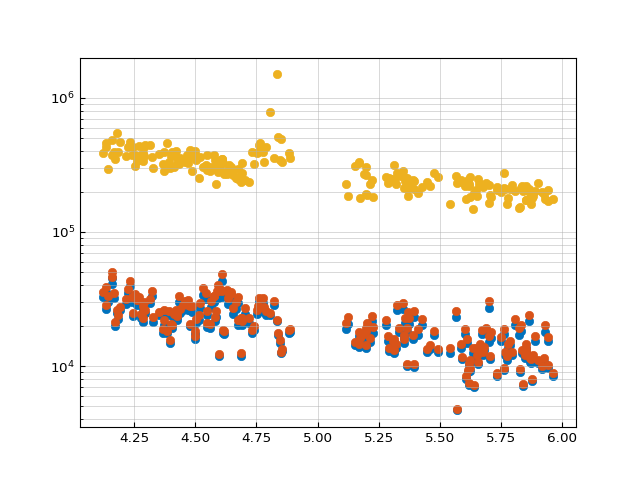

In [8]:
fig, ax = plt.subplots()
ax.scatter(df_extended['f0_Q'], df_extended['Ql'], label='f0_meas vs f0_Q')
ax.scatter(df_extended['f0_Q'], df_extended['Qc'], label='f0_meas vs f0_Q')
ax.scatter(df_extended['f0_Q'], df_extended['Qi'], label='f0_meas vs f0_Q')
ax.set_yscale('log')
num_nans_f0_Q = df_extended['f0_Q'].isna().sum()
print(f"Number of NaNs in f0_Q: {num_nans_f0_Q}")

mean= 0.0888469716331552 std= 0.4414842969982425


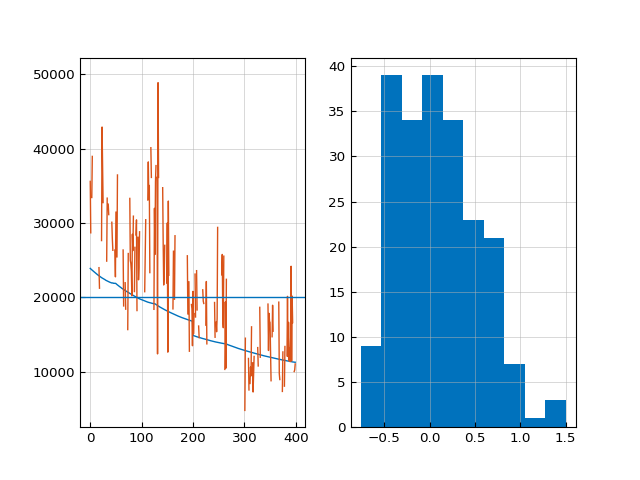

In [10]:
fig, axes = plt.subplot_mosaic('ab')
ax = axes['a']
ax.plot(fab_Qc)
Qc = df_extended['Qc']
ax.plot(Qc)
ax.axhline(20e3)
ax = axes['b']
dQ_Q = (Qc - fab_Qc)/fab_Qc
dQ_Q = (Qc - 20e3)/20e3
_ = ax.hist(dQ_Q)
print('mean=', np.nanmean(dQ_Q), 'std=', np.nanstd(dQ_Q))

(4.1, 4.2)

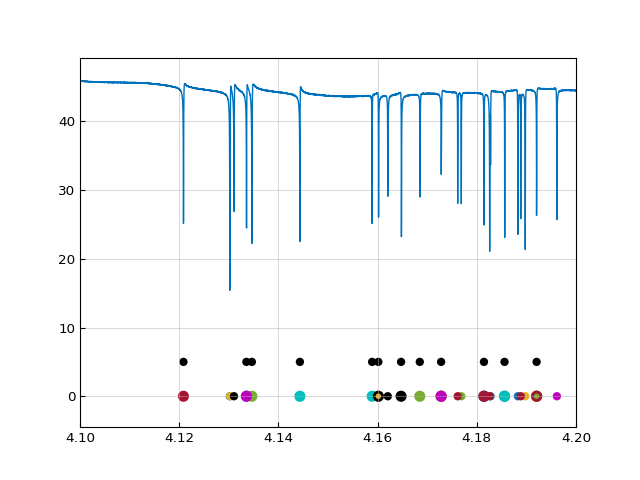

In [83]:
from itertools import cycle

dark_s21 = np.load('LT295chip3_dark.npy')
dark_freqs = np.load('LT295chip3_freqs.npy')
fig, ax = plt.subplots()
ax.plot(dark_freqs, dark_s21)
colors = cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])
f0_corr = f0 - (f0[0] - f0_mapped[0])
ax.scatter(f0_Q - (f0_Q[0]-f0_mapped[0]), 5*np.ones(len(f0_Q)), facecolor='k', edgecolor='None', linewidth=2, label='f0 mapped')
for idx, f in enumerate(f0_mapped):
    c= next(colors)
    ax.scatter(f0_mapped[idx], 0, facecolor=c, edgecolor='none', linewidth=2)
    ax.scatter(f0_corr[idx], 0, facecolor='none', edgecolor=c, linewidth=2)
    # ax.scatter(f0_Q[idx], 0, facecolor=c, edgecolor='None')
ax.set_xlim(4.1, 4.2)